# **CA4. Multiprocessing:**

Team members:
* Fatima Miranda Pestaña
* Eduardo Mendoza Vargas
* Cynthia Vidal Ovando

Data 7B

In [ ]:
import random
import multiprocessing
import timeit
import random
import time
import cProfile
from multiprocessing import Pool
import matplotlib.pyplot as plt

## First Function: pi_serial(samples)

The Monte Carlo approximation method to calculate the value of Pi. We generate random points inside a square with side length 2, centered at the origin. For each random point generated, we check whether the point falls within the inscribed circle of radius 1. If the point falls within the circle (i.e., if the distance from the origin to the point is less than or equal to 1), we count it as a "hit". After generating a specified number of random points (determined by the parameter 'samples'), we calculate the ratio of hits to total points. Since the area of the inscribed circle is π and the area of the square is 4, the ratio of hits to total points can be used to approximate the value of π. The more points we generate, the closer the approximation to the actual value of π.

In [ ]:
def pi_serial(samples):
    hits = 0
    for _ in range(samples):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            hits += 1
    return (4.0 * hits) / samples

In [ ]:
samples = 10000 # we choose 10,000 as is the limmit for colab :)
start_time = time.time()
pi_estimate = pi_serial(samples)
print(f"Serial Pi estimation: {pi_estimate}")
print(f"Time taken: {time.time() - start_time} seconds")

Serial Pi estimation: 3.1352
Time taken: 0.029298782348632812 seconds


## Second Function: pi_apply_async(samples)

Multiprocessing allows multiple tasks to be executed simultaneously, taking advantage of the multiple CPU cores available in a system. In the context of the Monte Carlo approach to estimating Pi, multiprocessing can be used to generate and process multiple random point samples in parallel, which significantly speeds up the computation.

We use the Pool() class of the multiprocessing module to create a set of processes. Each process is responsible for generating a portion of the random point samples and counting how many of those points fall within the circle. By dividing the work among several processes, we can process the samples concurrently, which reduces the overall execution time compared to a sequential approach.

In [ ]:
def sample():
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    return 1 if x**2 + y**2 <= 1 else 0

In [ ]:
def pi_apply_async(samples):
    with Pool() as pool:
        results_async = [pool.apply_async(sample) for _ in range(samples)]
        hits = sum(r.get() for r in results_async)
    return (4.0 * hits) / samples

In [ ]:
if __name__ == '__main__':
    pi_estimate = pi_apply_async(1000)  # Start with a small number for testing
    print(f"Estimated Pi value: {pi_estimate}")

Estimated Pi value: 3.132


In [ ]:
if __name__ == '__main__':
    start_time = time.time()
    pi_estimate = pi_apply_async(1000)
    end_time = time.time()
    print(f"Estimated Pi value: {pi_estimate}")
    print(f"Time taken: {end_time - start_time} seconds")

Estimated Pi value: 3.152
Time taken: 0.16382908821105957 seconds


## Third function: pi_apply_async_chunked(samples, n_tasks)

By dividing the work into larger blocks and using multiple processes to process these blocks in parallel, we can better utilize the processing power of the system and reduce the overall execution time of the computation. This is especially useful when the total number of samples is very large, as it allows us to efficiently distribute the work across multiple CPU cores.

We use multiprocessing to speed up the calculation of Pi estimation using the Monte Carlo approach, we divide the job into larger blocks. We calculate the size of each block (chunk_size) by dividing the total number of samples by the number of tasks (n_tasks). Then, we create a set of processes using Pool() and assign each process to execute the sample_multiple function with a block of samples.

Each process spawns a sample block and counts the "hits" within the circle independently. Once all processes have completed their task, we sum the total hits of all blocks and calculate the Pi estimate using the formula (4.0 * hits) / samples.

In [ ]:
def sample_multiple(samples_partial):
    return sum(sample() for _ in range(samples_partial))

In [ ]:
def pi_apply_async_chunked(samples, n_tasks=10):
    chunk_size = samples // n_tasks
    with Pool() as pool:
        results_async = [pool.apply_async(sample_multiple, (chunk_size,)) for _ in range(n_tasks)]
        hits = sum(r.get() for r in results_async)
    return (4.0 * hits) / samples

In [ ]:
def pi_apply_async_chunked(samples, n_tasks=10):
    chunk_size = samples // n_tasks
    with Pool() as pool:
        results_async = [pool.apply_async(sample_multiple, (chunk_size,)) for _ in range(n_tasks)]
        hits = sum(r.get() for r in results_async)
    return (4.0 * hits) / samples

In [ ]:
if __name__ == '__main__':
    pi_estimate = pi_apply_async_chunked(1000)  # Use a small number for testing
    print(f"Estimated Pi value: {pi_estimate}")

Estimated Pi value: 3.2


In [ ]:
if __name__ == '__main__':
    start_time = time.time()
    pi_estimate = pi_apply_async_chunked(1000, n_tasks=10)
    end_time = time.time()
    print(f"Estimated Pi value: {pi_estimate}")

Estimated Pi value: 3.124


## TimeIt


In [ ]:
if __name__ == "__main__":
    serial_time = timeit.timeit('pi_serial(samples)', globals=globals(), number=1)
    async_time = timeit.timeit('pi_apply_async(samples)', globals=globals(), number=1)
    async_chunked_time = timeit.timeit('pi_apply_async_chunked(samples, n_tasks=10)', globals=globals(), number=1)

    # Imprimir los tiempos
    print("Time for pi_serial:", serial_time)
    print("Time for pi_apply_async:", async_time)
    print("Time for pi_apply_async_chunked:", async_chunked_time)


Time for pi_serial: 0.023396636999677867
Time for pi_apply_async: 0.9386706559998856
Time for pi_apply_async_chunked: 0.058707331000732665


## cProfile


In [ ]:
cProfile.run('pi_serial(samples)')


         40004 function calls in 0.021 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.021    0.021 <ipython-input-80-69690d1fd708>:1(pi_serial)
        1    0.000    0.000    0.021    0.021 <string>:1(<module>)
    20000    0.009    0.000    0.011    0.000 random.py:546(uniform)
        1    0.000    0.000    0.021    0.021 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
    20000    0.002    0.000    0.002    0.000 {method 'random' of '_random.Random' objects}




In [ ]:
cProfile.run('pi_apply_async(samples)')

         183592 function calls in 1.061 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       12    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:404(parent)
        1    0.000    0.000    1.049    1.049 <ipython-input-83-a1731f57016e>:1(pi_apply_async)
        1    0.009    0.009    0.744    0.744 <ipython-input-83-a1731f57016e>:3(<listcomp>)
    10001    0.067    0.000    0.258    0.000 <ipython-input-83-a1731f57016e>:4(<genexpr>)
        1    0.012    0.012    1.061    1.061 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 __init__.py:219(_acquireLock)
        2    0.000    0.000    0.000    0.000 __init__.py:228(_releaseLock)
        4    0.000    0.000    0.000    0.000 __init__.py:259(__iter__)
        2    0.000    0.000    0.000    0.000 _weakrefset.py:39(_remove)
        5    0.000    0.000    0.000    0.000 _weakrefset.py:86(add)
        6    0.000    0.000    0.000    0.000 con

In [ ]:
cProfile.run('pi_apply_async_chunked(samples, n_tasks=10)')

         1125 function calls in 0.077 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       12    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:404(parent)
        1    0.000    0.000    0.076    0.076 <ipython-input-88-b02e03db2a9b>:1(pi_apply_async_chunked)
        1    0.000    0.000    0.000    0.000 <ipython-input-88-b02e03db2a9b>:4(<listcomp>)
       11    0.000    0.000    0.032    0.003 <ipython-input-88-b02e03db2a9b>:5(<genexpr>)
        1    0.000    0.000    0.077    0.077 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 __init__.py:219(_acquireLock)
        2    0.000    0.000    0.000    0.000 __init__.py:228(_releaseLock)
        5    0.000    0.000    0.000    0.000 _weakrefset.py:39(_remove)
        5    0.000    0.000    0.000    0.000 _weakrefset.py:86(add)
        6    0.000    0.000    0.000    0.000 connection.py:117(__init__)
        6    0.000    0.000    0.000    0

## Grphics

In [ ]:
import numpy as np
if __name__ == "__main__":
    # Run and mesure the time of each function, we already did this in the TimeIt section :)
    serial_time = timeit.timeit(lambda: pi_serial(samples), number=1)
    async_time = timeit.timeit(lambda: pi_apply_async(samples), number=1)
    async_chunked_time = timeit.timeit(lambda: pi_apply_async_chunked(samples, n_tasks=10), number=1)

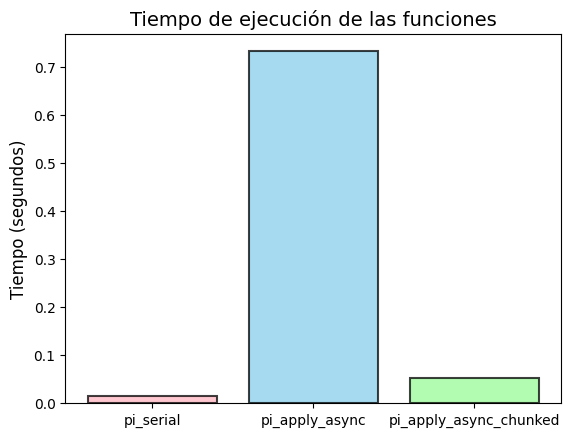

In [ ]:
times = [serial_time, async_time, async_chunked_time]
labels = ['pi_serial', 'pi_apply_async', 'pi_apply_async_chunked']

num_bars = len(times)
colors = ['#FFB6C1', '#87CEEB', '#98FB98']

plt.bar(labels, times, color=colors, alpha=0.75, edgecolor='black', linewidth=1.5, capsize=7)

plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.title('Tiempo de ejecución de las funciones', fontsize=14)

plt.show()

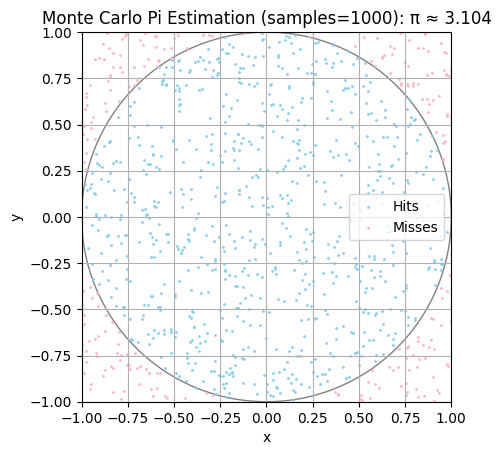

3.104

In [ ]:
# MonteCarlo Aproximation

import matplotlib.pyplot as plt
import random

# Function to estimate Pi using Monte Carlo method and visualize the result
def visualize_monte_carlo_pi_estimation(samples):
    hits_x = []
    hits_y = []
    misses_x = []
    misses_y = []

    # Perform Monte Carlo simulation
    hits = 0
    for _ in range(samples):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            hits += 1
            hits_x.append(x)
            hits_y.append(y)
        else:
            misses_x.append(x)
            misses_y.append(y)

    # Estimate Pi
    pi_estimate = (4 * hits) / samples

    # Plotting
    fig, ax = plt.subplots()
    circle = plt.Circle((0, 0), 1, edgecolor='gray', facecolor='none')
    ax.add_artist(circle)
    ax.scatter(hits_x, hits_y, color='#87CEEB', s=1, label='Hits')
    ax.scatter(misses_x, misses_y, color='#FFB6C1', s=1, label='Misses')
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.legend()
    plt.title(f"Monte Carlo Pi Estimation (samples={samples}): π ≈ {pi_estimate}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

    return pi_estimate

# We will visualize the Monte Carlo method with 1000 samples for clarity.
visualize_monte_carlo_pi_estimation(1000)

## Our conlusion

We note that pi_serial executes the computation sequentially, without taking advantage of multiprocessing. Although it is simple and easy to understand, its execution time is considerably longer compared to the other functions (since it processes sequentially, which limits the ability to efficiently use system resources), on the other hand pi_apply_async uses multiprocessing by using Pool.apply_async() to generate samples concurrently. However, the execution time is still longer than ideal, suggesting that the multiprocessing approach used here may not be the most efficient. The creation and management of multiple processes can introduce significant overhead, which can affect performance, and last but not least, the pi_apply_async_chunked, which improves the multiprocessing approach by dividing the work into larger blocks and assigning them to individual processes. By reducing the amount of inter-process communication and distributing work more efficiently, it achieves faster execution time compared to the other functions. Although there is still some overhead associated with process creation and management, it is minimized compared to pi_apply_async.

In a short way, the pi_apply_async_chunked function achieves the best performance in terms of runtime, as it optimizes the use of multiprocessing by splitting the job into larger blocks.